In [1]:
import pandas as pd
import sqlite3

DB = "../data/checking-logs.sqlite"
conn = sqlite3.connect(DB)
query = """
SELECT timestamp AS datetime
FROM checker
WHERE uid LIKE 'user_%';
"""
data = pd.read_sql(query, conn)
conn.close()


In [2]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['weekday'] = data['datetime'].dt.weekday
data['is_weekend'] = data['weekday'] >= 5
data.head(10)

,datetime,hour,weekday,is_weekend
0,2020-04-17 05:19:02.744528,5,4,False
1,2020-04-17 05:22:35.249331,5,4,False
2,2020-04-17 05:22:45.549397,5,4,False
3,2020-04-17 05:34:14.691200,5,4,False
4,2020-04-17 05:34:24.422370,5,4,False
5,2020-04-17 05:43:18.546760,5,4,False
6,2020-04-17 05:43:27.773992,5,4,False
7,2020-04-17 05:46:22.151752,5,4,False
8,2020-04-17 05:46:32.275104,5,4,False
9,2020-04-17 05:50:17.757425,5,4,False


In [3]:
grouped = data.groupby([data['datetime'].dt.date,'hour','is_weekend']).size().reset_index(name='count')
grouped.head(5)

,datetime,hour,is_weekend,count
0,2020-04-17,5,False,13
1,2020-04-17,11,False,8
2,2020-04-17,12,False,2
3,2020-04-18,7,True,1
4,2020-04-18,13,True,5


In [4]:
avg = grouped.groupby(['hour','is_weekend'])['count'].mean().unstack()
avg.columns = ['working_day','weekend']
avg

,working_day,weekend
hour,,
0,3.000000,2.000000
1,NaN,6.000000
3,2.000000,1.000000
5,7.500000,2.000000
6,1.500000,NaN
7,5.166667,4.000000
8,3.700000,7.000000
9,6.000000,3.666667
10,13.200000,7.000000


In [5]:
# Hour with most commits on working days
working_peak_hour = avg['working_day'].idxmax()
working_peak_value = avg['working_day'].max()

# Hour with most commits on weekends
weekend_peak_hour = avg['weekend'].idxmax()
weekend_peak_value = avg['weekend'].max()

# Print the results
print(f"On working days, the highest average number of commits is at {working_peak_hour}:00 with {working_peak_value:.2f} commits.")
print(f"On weekends, the highest average number of commits is at {weekend_peak_hour}:00 with {weekend_peak_value:.2f} commits.")



On working days, the highest average number of commits is at 21:00 with 24.33 commits.
On weekends, the highest average number of commits is at 11:00 with 23.60 commits.


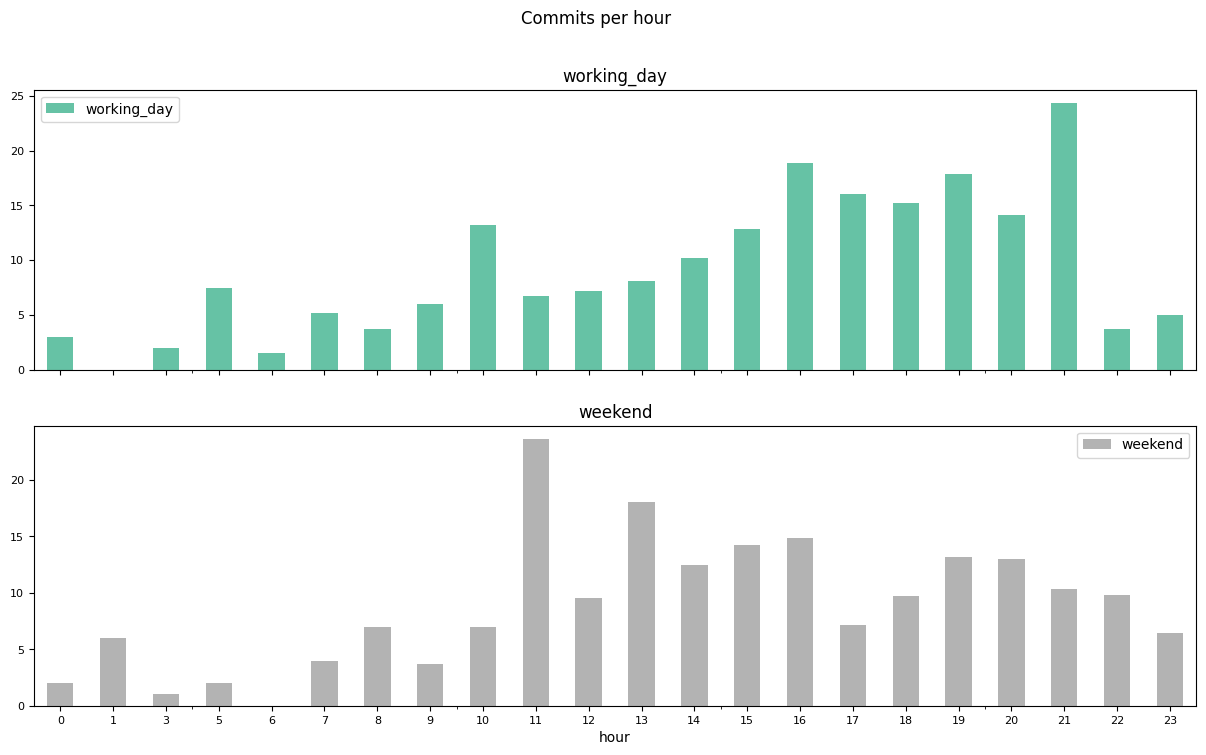

In [6]:
bar = avg.plot.bar(
    subplots=True,
    layout = (2,1),
    figsize = (15,8),
    colormap = 'Set2',
    fontsize = 8,
    title = 'Commits per hour',
)

for ax in bar.flatten():
    ax.xaxis.set_tick_params(rotation=0)

Is the dynamic different on working days and weekends?

Yes, 
The first answer is 21:00 (21st hour)

The second answer is 11:00 (11st hour)